In [1]:
import os
import glob
import json
import pickle
from collections import defaultdict

import numpy as np
import pandas as pd

import seaborn as sb
from matplotlib import pyplot as plt

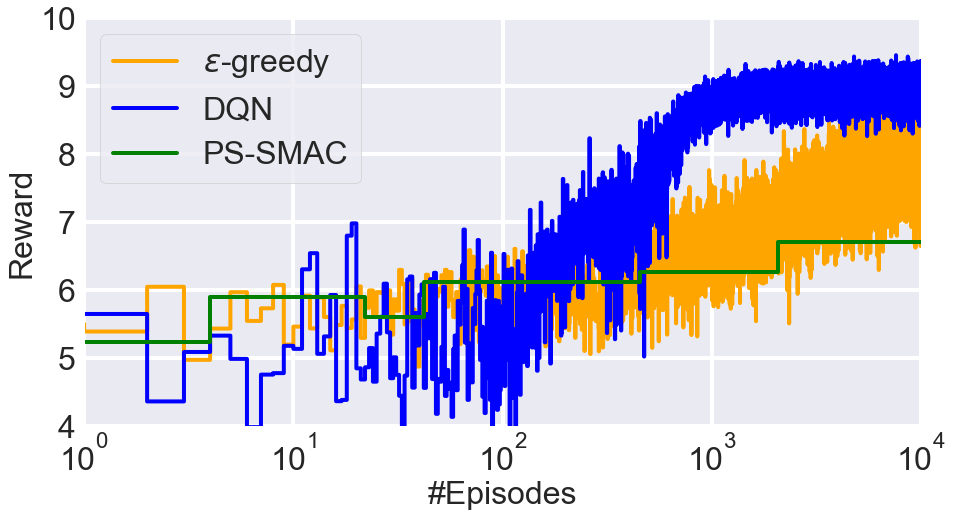

Here we plot the results for only 1 run!
Comparable to results shown in Figure 3(a) of the paper.


In [2]:
# load PS-SMAC data
ps_smac_x, ps_smac_y = [], []
with open(os.path.join('example-results-1D-trinary-action-Sigmoid',
                       'smac3-output', 'run_1', 'validated_traj.json'), 'r') as fh:
    for line in fh.readlines()[1:]:  # skip first line as it is not needed
        ps_smac_data = json.loads(line)
        ps_smac_x.append(ps_smac_data['evaluations'])
        ps_smac_y.append(ps_smac_data['cost']*-1)
# As the final incumbent most likely was found before the budget was exhausted, we need
# to append the last cost again at max_steps
ps_smac_x.append(10**4)
ps_smac_y.append(ps_smac_data['cost']*-1)

# load 0.1-greedy
fig = plt.figure(figsize=(15, 7.5))
with open(os.path.join('example-results-1D-trinary-action-Sigmoid',
                       'tabular',
                       '0000_0.1-greedy-stats-1D3M-10000_eps-1_reps-seed_0.pkl'),
          'rb') as fh:
      data = pickle.load(fh)

# Load Chainer Data (Only 1 repetition in the data)
file = os.path.join("example-results-1D-trinary-action-Sigmoid", "DQN", 'scores.txt')
chainer_data = pd.read_csv(file, sep='\t')


# Get the same style as plots in the paper
sb.set_style("darkgrid")
sb.set_context("paper",  font_scale = 1,
               rc={
                   "grid.linewidth": 4,
                   'axes.labelsize': 32,
                   "axes.titlesize": 32,
                   "legend.fontsize": 32.0,
                   'lines.linewidth': 4,
                   'xtick.labelsize': 32.0,
                   'ytick.labelsize': 32.0,
               })
# plot
plt.step(np.arange(len(data)), data, c='orange', label=r'$\epsilon$-greedy',
         where='post')
plt.step(chainer_data['episodes'], chainer_data['mean'], c='b', label='DQN',
         where='post')
plt.step(ps_smac_x, ps_smac_y, c='green', label='PS-SMAC', where='post')
plt.xlabel('#Episodes')
plt.ylabel('Reward')
plt.ylim([4, 10])
plt.xlim([1, 10**4])
plt.semilogx()
plt.legend()
plt.show()
print('Here we plot the results for only 1 run!')
print('Comparable to results shown in Figure 3(a) of the paper.')